# Cleaning

In [13]:
# import the required libraries
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer


In [14]:
# display configurations
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [15]:
# read the dataset
df = pd.read_excel("../input/Real_Estate Data.xlsx" )

#### Preliminary exploration

In [16]:
# check the shape of the data
df.shape

(200, 17)

In [17]:
# check for random 10 rows 
df.sample(10)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
138,139,"Pune, Maharashtra, India",vimannagar,3bhk,1154,146,14.600,Oxy Buildcorp,Oxy Beaumonde,NaN,yes,no,no,no,yes,yes,yes
106,107,"Pune, Maharashtra, India",Undri,2bhk,646,43.2,4.320,venkatesh bhoomi construction,Bliss Solitaire,NaN,no,no,no,no,yes,no,no
61,62,"Pune, Maharashtra, India",kiwale,2bhk,670,54.14,5.414,unique properties,k ville,NaN,yes,no,No,No,yes,yes,no
113,114,"Pune, Maharashtra, India",handewadi,3bhk,810,54,5.400,Lush Life,Impero,NaN,no,no,no,no,yes,no,no
154,155,"Pune, Maharashtra, India",Susgaon,3bhk,854,67,6.700,Porwal & Anand Develkoper,Parklane UrbanJoy,NaN,yes,no,no,no,yes,yes,yes
173,174,"Pune, Maharashtra, India",Kharadi,2 bhk,408,39.99,3.999,Vijaya Laxmi Creations,Satyam Shivam,NaN,yes,no,no,no,yes,no,yes
36,37,"Pune, Maharashtra, India",Balewadi,3BHK,990,90,9.000,Mantra Properties,Mantra Monarch,3.0,Yes,No,No,No,Yes,Yes,Yes
62,63,"Pune, Maharashtra, India",kiwale,2bhk,740,58.32,5.832,unique properties,k ville,NaN,yes,no,No,No,yes,yes,no
81,82,"Pune, Maharashtra, India",mahalunge,3 bhk,1093,92,9.200,jhala group,mahalunge riviera,NaN,yes,no,no,no,yes,yes,yes
128,129,"Pune, Maharashtra, India",Hinjewadi,3+2bhk,1772,177,17.700,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes


In [18]:
# show the columns 
df.columns

Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [20]:
# rename a column
df.rename(columns={'Propert Type':'Property Type'}, inplace = True)

## Cleaning the property's characteristics 

In [21]:
# cleaning the property type column 
for i in df["Property Type"].unique() :
    print(i)

1 BHK
2 BHK
3 BHK
3 BHK Grand
2BHK
3BHK
4BHK
5BHK
6BHK
1BHK
shop
2 bhk
2bhk 
3  bhk 
3 bhk
2bhk
2.5 BHK
3 BHK 
4 bhk
1 bhk
2.5 bhk
1bhk
3bhk
3.5bhk
3.5 bhk
3bhk 
2+2 bhk
3+2bhk 
2 bhk 
5 bhk
1bhk 
4.5bhk
4bhk


In [25]:
df[df['Property Type'] == 'shop']

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
51,52,"Pune, Maharashtra, India",pimpri pune,shop,163,54,5.4,ravima ventures,the work club,NaN,no,No,No,No,Yes,no,Yes


In [26]:
df = df[ df["Property Type"]!="shop" ]
df.shape

(199, 17)

In [28]:
# Do the same for Property Area in Sq. Ft.
for i in df["Property Area in Sq. Ft."].unique():
    print(i)

492
774
889
1018
743
975
877 to 912
1077 to 1272
905
1125
1644
2220
662 to 845
890 to 1212
423
665
792 to 965
462
666
750
1030
446
796
842
865
902
1154
872
934
1088
1109
1163
1419
1485
684
990
882
1103
543
801 to 1125
1272 to 2138
320
473
581
790
820
989
1003
1182
1579
491
659
732
809
460
734
753
675
917
670
740
847
936
1032
1698
2267
725
731
744
923
930
792
1180
860
988
1093
456
644
785
1060
113
664
673
682
698
1239
1315
1388
1463
1671
1687
575
751
761
871
1166
1206
1272
1279
646
717
436
637
642
655
668
810
735
783
805
1074
1111
535
947
697
711
980
1400
1772
1662
705
726
793
904
1168
1189
479
693
808
1086
844
873
606
611
626
691
835
854
715
624 to 761
968
996
1038
489
598
616
692
867
908
1624
2043
727
561 to 902
1056 to 1091
408
546
629
378
494
780
850
900
1181, 1364
1740
2447
405
392
667
641
280
385
730
1070 to 1200
1300 to 1400
1600 +
769 to 809 
1101 to 1113
776


In [32]:
def splitSum(s, flag=True ) :
    """
    Gives the total number of bedrooms / property area
    params :
        s : string, either the number of rooms or property area
        flag : boolean, True : number of bedrooms, False : property area
    return :
        float, number of bedrooms / Property Area
    """
    try :
        s = str(s).lower()
        s = re.sub(r"[,;@#?!&$+]+\ *", " ", s)
        s = re.sub(r"[a-z]+", " ", s)
        s = re.sub(r"\s\s", "", s)

        splittedList = s.strip().split()
        sumList = sum(float(s) for s in splittedList)
            
        # Computing the mean value for property area that look like 
        # e.g. '1101 to 1113'
        s_norm = sumList if flag else sumList/len(splittedList)
        return s_norm

    except :
        return np.nan

In [41]:
# Cleaning the following columns ['Property Type', 'Property Area in Sq. Ft.'] using the splitSum function
df['Property Type'] = df['Property Type'].apply(lambda x : splitSum(x))
df['Property Area in Sq. Ft.'] = df['Property Area in Sq. Ft.'].apply(lambda x : splitSum(x,False))

In [43]:
df["Property Type"].unique()

array([1. , 2. , 3. , 4. , 5. , 6. , 2.5, 3.5, 4.5])

In [45]:
for i in df["Property Area in Sq. Ft."].unique():
    print(i)

492.0
774.0
889.0
1018.0
743.0
975.0
894.5
1174.5
905.0
1125.0
1644.0
2220.0
753.5
1051.0
423.0
665.0
878.5
462.0
666.0
750.0
1030.0
446.0
796.0
842.0
865.0
902.0
1154.0
872.0
934.0
1088.0
1109.0
1163.0
1419.0
1485.0
684.0
990.0
882.0
1103.0
543.0
963.0
1705.0
320.0
473.0
581.0
790.0
820.0
989.0
1003.0
1182.0
1579.0
491.0
659.0
732.0
809.0
460.0
734.0
753.0
675.0
917.0
670.0
740.0
847.0
936.0
1032.0
1698.0
2267.0
725.0
731.0
744.0
923.0
930.0
792.0
1180.0
860.0
988.0
1093.0
456.0
644.0
785.0
1060.0
113.0
664.0
673.0
682.0
698.0
1239.0
1315.0
1388.0
1463.0
1671.0
1687.0
575.0
751.0
761.0
871.0
1166.0
1206.0
1272.0
1279.0
646.0
717.0
436.0
637.0
642.0
655.0
668.0
810.0
735.0
783.0
805.0
1074.0
1111.0
535.0
947.0
697.0
711.0
980.0
1400.0
1772.0
1662.0
705.0
726.0
793.0
904.0
1168.0
1189.0
479.0
693.0
808.0
1086.0
844.0
873.0
606.0
611.0
626.0
691.0
835.0
854.0
715.0
692.5
968.0
996.0
1038.0
489.0
598.0
616.0
692.0
867.0
908.0
1624.0
2043.0
727.0
731.5
1073.5
408.0
546.0
629.0
378.0
494.0


In [46]:
df.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

## Detect and clean the outliers

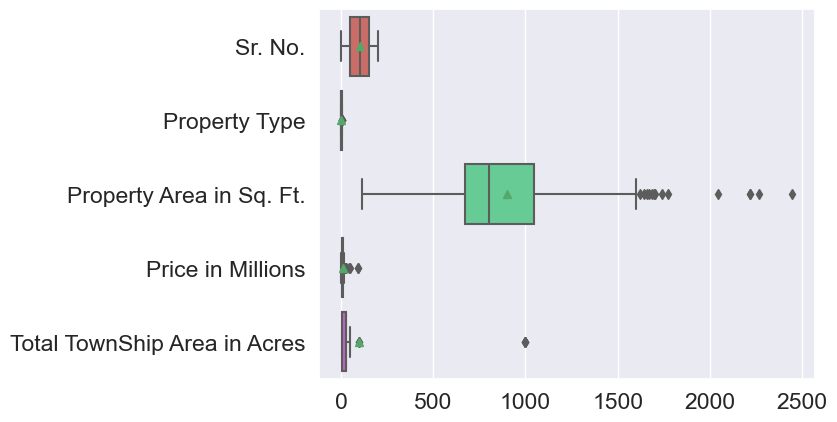

In [48]:
sns.boxplot(data=df, orient="h", palette='hls', showmeans=True)
plt.show()

In [51]:
def remove_outliers(df, column):
    """
    Detects and removes outliers in a specific column of a DataFrame.

    Args:
    df: The DataFrame containing the data.
    column: The name of the column to analyze.

    Returns:
    A new DataFrame with the outliers removed.
    """
    # Calculate the interquartile range (IQR)
    q1= df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Identify and remove outliers
    filtered_df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

    return filtered_df

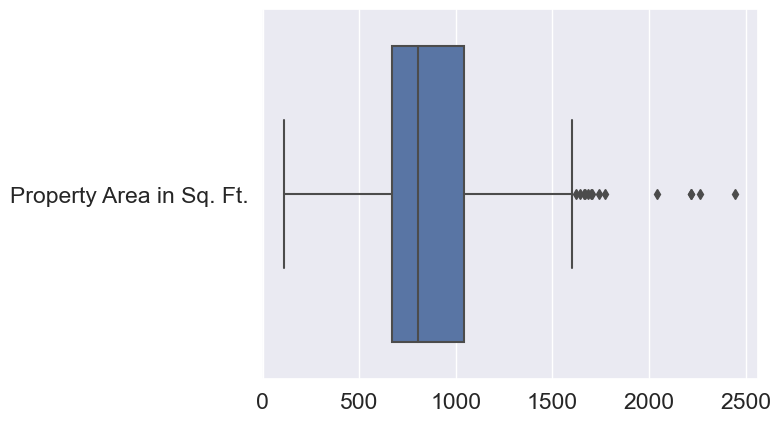

In [52]:
# Looking for outliers
sns.boxplot( data=df[["Property Area in Sq. Ft."]], orient="h" )
plt.show()

In [55]:
# Checking the outliers for Property Area in Sq. Ft. and remove them 
df = remove_outliers(df.copy(),'Property Area in Sq. Ft.')
df

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.500,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.500,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.000,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.500,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.800,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes


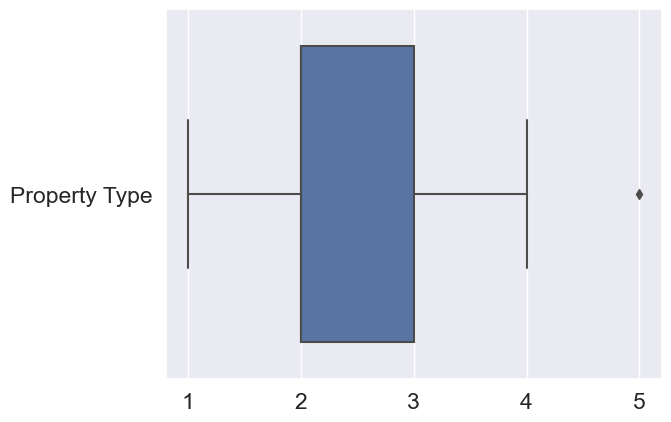

In [56]:
# Looking for outliers
sns.boxplot( data=df[["Property Type"]], orient="h" )
plt.show()

In [60]:
# Checking the outliers for Property type.
df = remove_outliers(df.copy(),'Property Area in Sq. Ft.')
df

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.500,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.500,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.000,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.500,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.800,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes


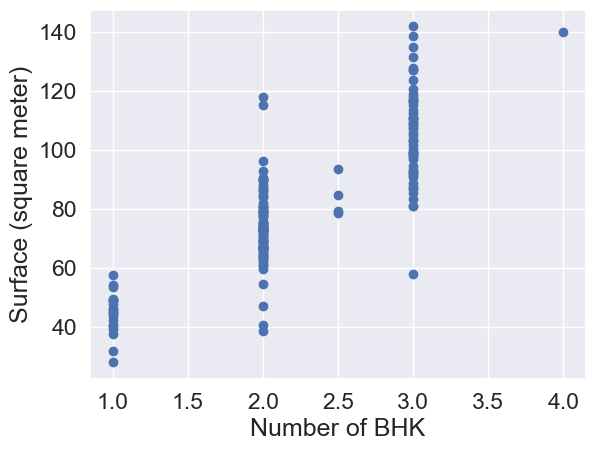

In [61]:
plt.scatter(df["Property Type"], 
            df["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")
plt.show()

In [62]:
df.shape

(180, 17)

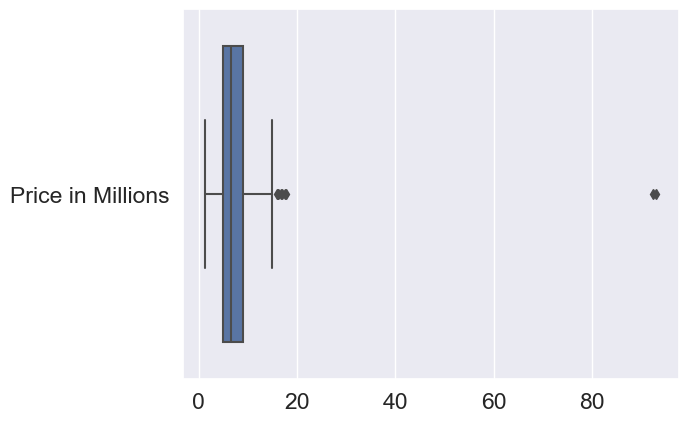

In [63]:
sns.boxplot(data=df[["Price in Millions"]], orient="h" )
plt.show()

In [65]:
# Checking the outliers for Price in Millions
df = remove_outliers(df,'Price in Millions')
df

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.500,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.500,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.000,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.500,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.800,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes


In [66]:
df.shape

(166, 17)

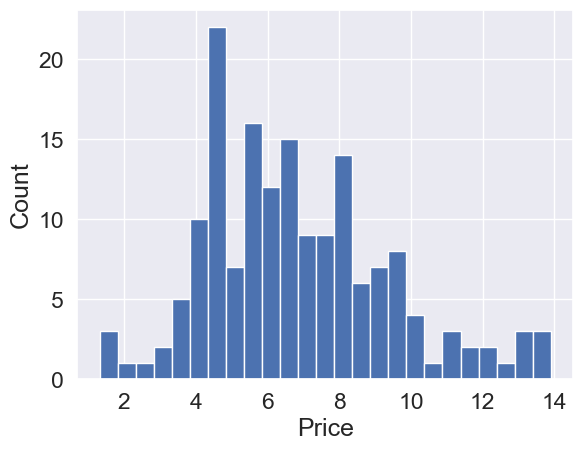

In [68]:
df["Price in Millions"].hist(bins=25)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

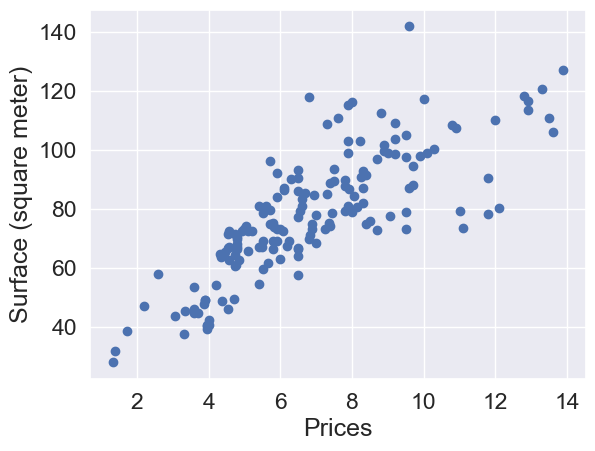

In [72]:
plt.scatter(df["Price in Millions"], 
            df["Property Area in Sq. Ft."]*.1)
plt.xlabel("Prices")
plt.ylabel("Surface (square meter)")
plt.show()

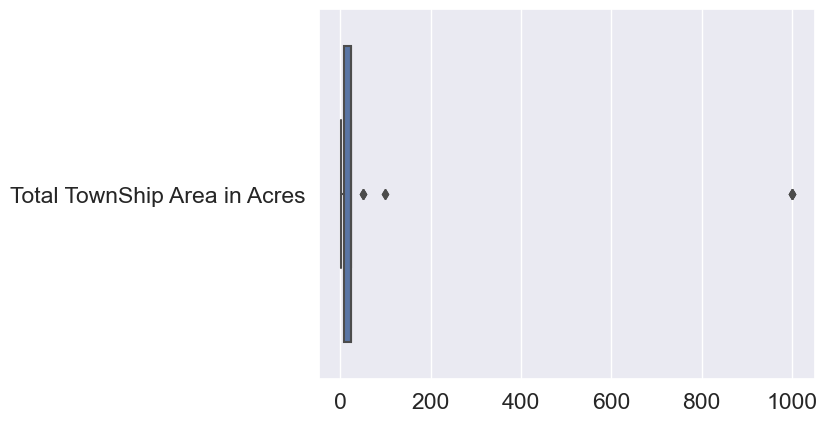

In [76]:
sns.boxplot( data=df[["Total TownShip Area in Acres"]], orient="h" )
plt.show()

In [77]:
# Checking the outliers for Total TownShip Area in Acres
df = remove_outliers(df,'Price in Millions')

In [78]:
df.shape

(164, 17)

## Price selection

In [79]:
# Comparing Price in Millions with Price in lakhs
df["Price in lakhs"] = df["Price in lakhs"].apply(lambda x: pd.to_numeric(x, errors='coerce'))

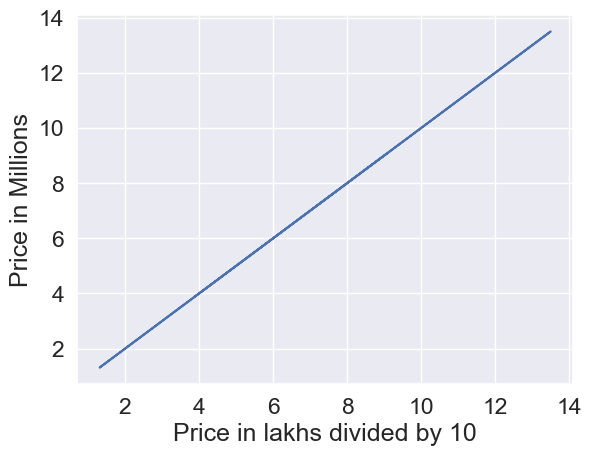

In [80]:
plt.plot( df["Price in lakhs"]*.1, df["Price in Millions"] )
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")
plt.show()


In [81]:
# drop one of the two columns 

df = df.drop(columns=["Price in lakhs"])

In [82]:
df.columns

Index(['Sr. No.', 'Location', 'Sub-Area', 'Property Type',
       'Property Area in Sq. Ft.', 'Price in Millions', 'Company Name',
       'TownShip Name/ Society Name', 'Total TownShip Area in Acres',
       'ClubHouse', 'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

## NaN values

In [96]:
def compute_fill_rate( df ) :
    """
    Computing the rate of non-NaNs for each column
    Params :
        df : Pandas dataframe, input data
    Return :
        Pandas dataframe
    """
    return pd.DataFrame(1-df.isnull().mean().values.reshape(1,-1), columns=df.columns)

###########################################
def plot_fill_rate( df ) : 
    """
    Plot the fill rate
    df : Pandas dataframe, input data
    """
    fill_rate = compute_fill_rate( df )
    fig, ax = plt.subplots( figsize=(18,18) )
    sns.barplot(data=fill_rate, orient="h")
    ax.set_title( "Fill rate for columns", fontsize=28 )
    ax.set(xlim=(0, 1.))
    
    
###########################################
def drop_empty_axis( df, minFillRate) :
    """
    Drops axes that do not meet the minimum non-Nan rate
    Params :
        df : Pandas dataframe
        minFillRate : float, minimum filled fraction [0,1]
    Returns :
        Pandas dataframe 
    """
    return df.dropna( axis=1, thresh=int(df.shape[0]*minFillRate) )


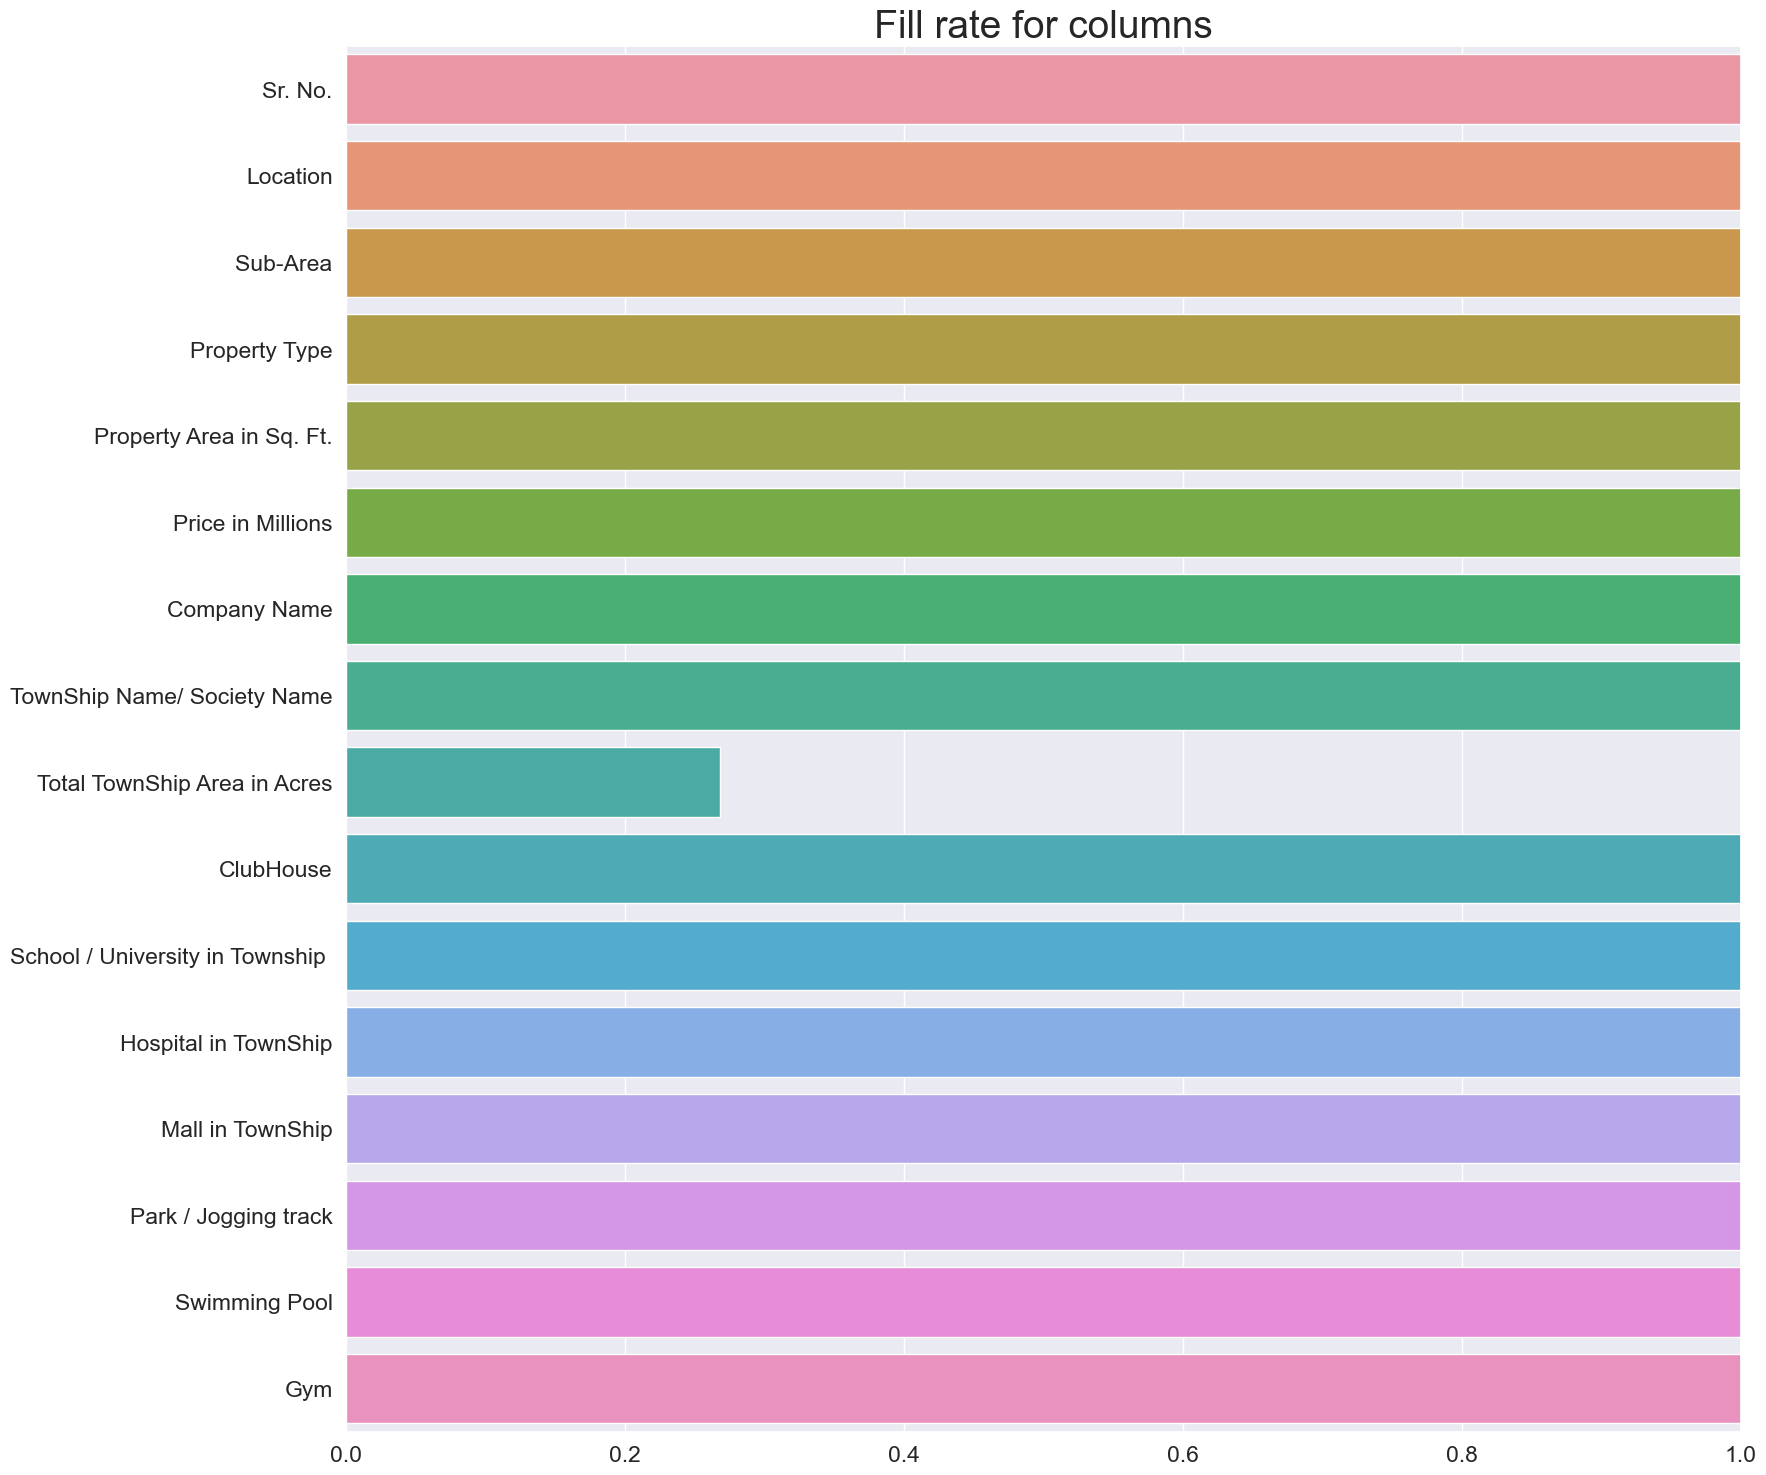

In [98]:
plot_fill_rate( df )

In [99]:
compute_fill_rate( df )

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.268293,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
# Total TownShip Area in Acres
df[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres" ]]\
    .sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,BANER,TEJ ELEVIA,2.5
6,BANER,vtp solitaire,NaN
7,BANER,SUPREME ESTIA,5.0
8,BANER,SUPREME ESTIA,5.0
9,BANER,TEJ ELEVIA,2.5


In [105]:
# Drop columns filled by less than 50%
df = drop_empty_axis(df, minFillRate=.5)

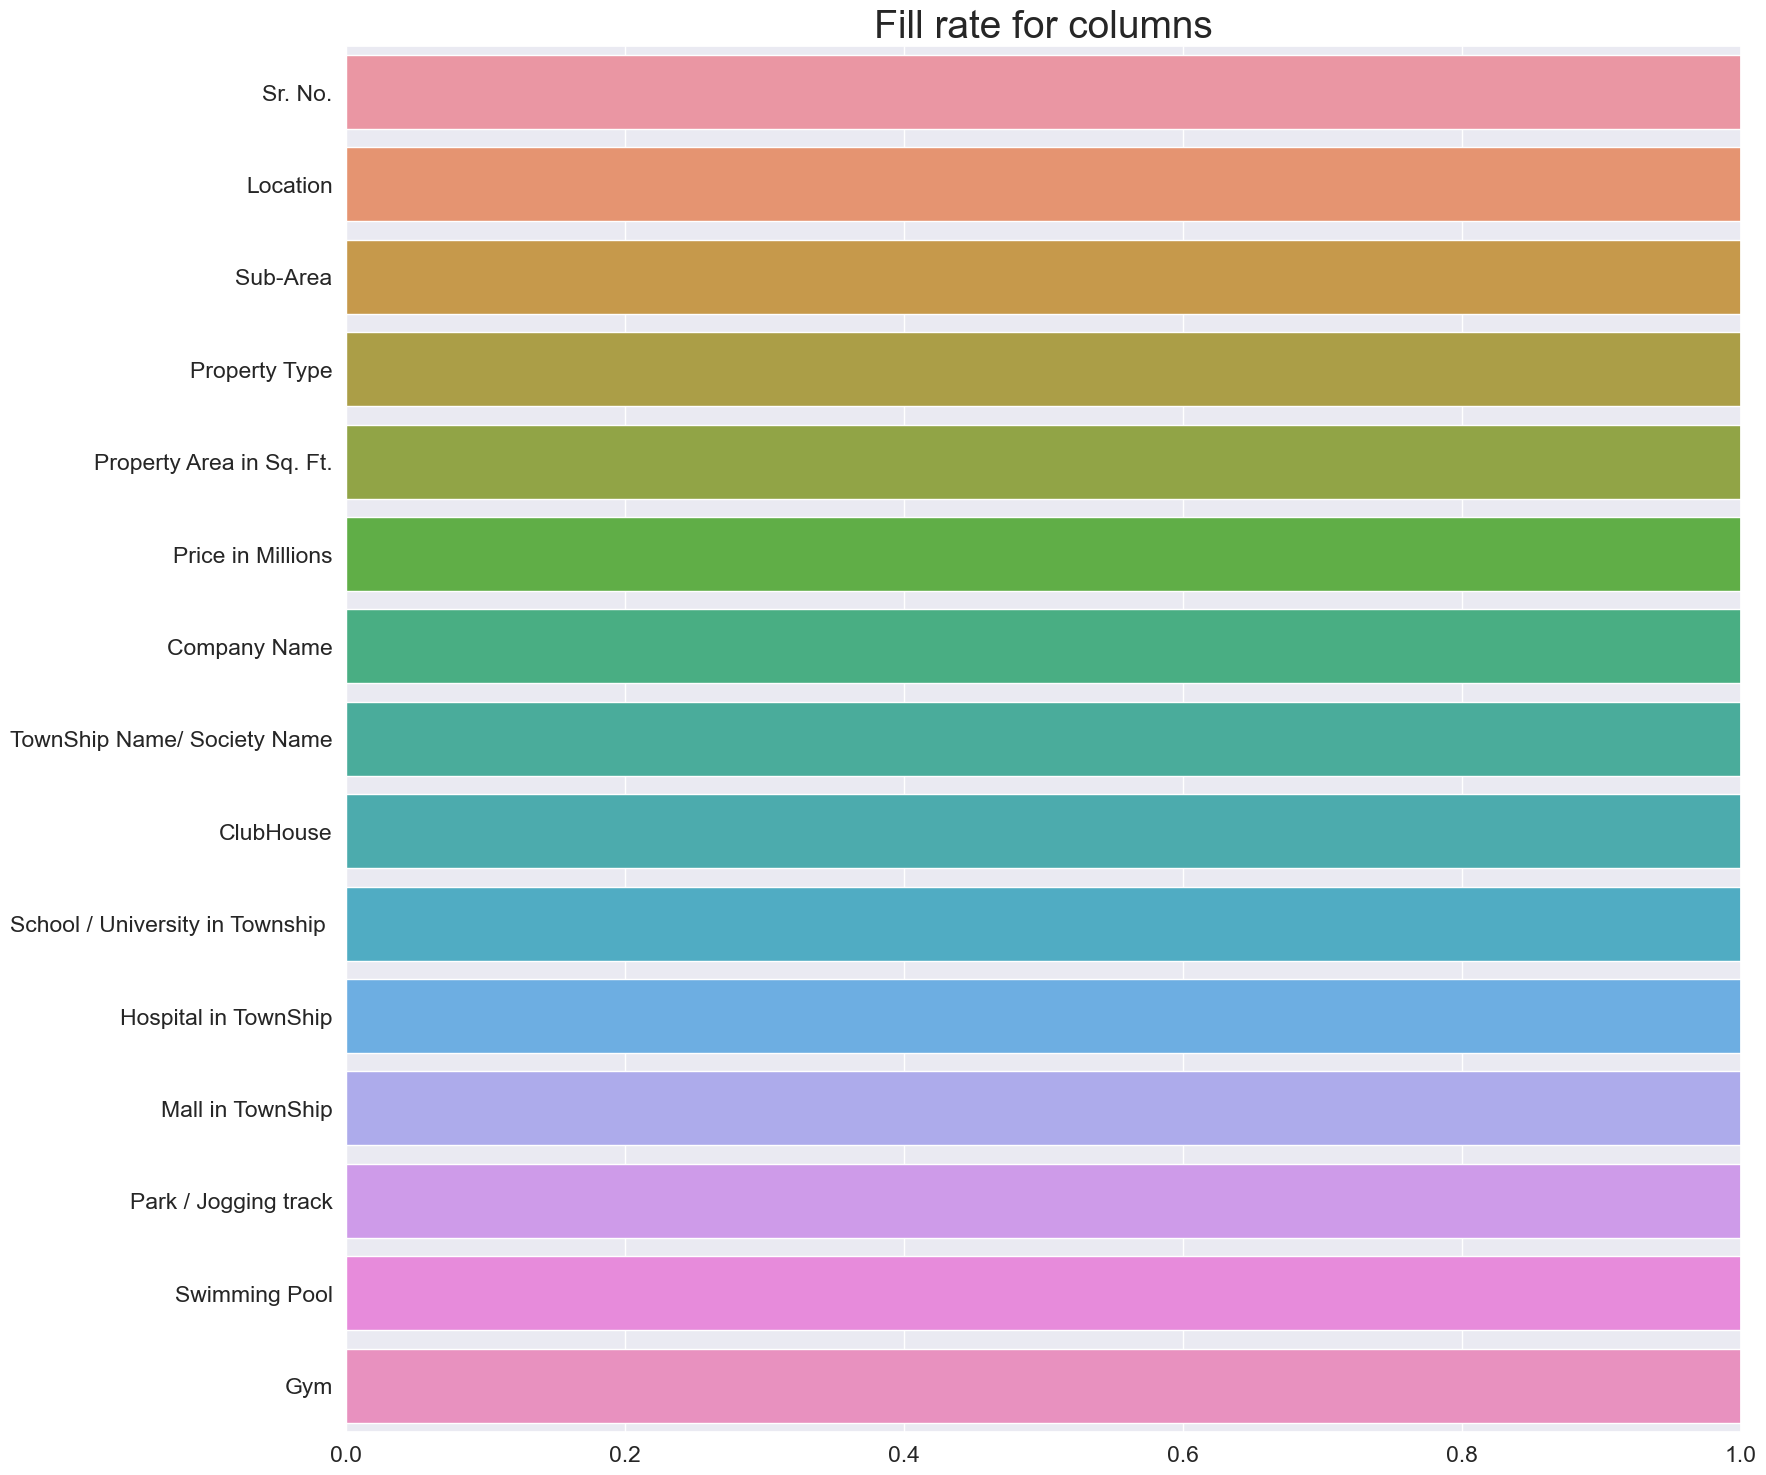

In [107]:
plot_fill_rate( df )

## Regularising the categorical columns

In [109]:
df.select_dtypes(include="object").head(3)

,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Binary categorical columns

In [110]:
binary_cols = df.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [111]:
def print_uniques( cols, data=df ):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")

In [112]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'yes']
Number of unique categories: 3
--------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
--------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
--------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
--------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------


In [113]:
# clean the binary columns
for col in binary_cols:
    df[col] = df[col].apply(lambda x: x.strip().lower())
    
print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
--------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
--------------------


#### Multi-categorical columns

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           164 non-null    int64  
 1   Location                          164 non-null    object 
 2   Sub-Area                          164 non-null    object 
 3   Property Type                     164 non-null    float64
 4   Property Area in Sq. Ft.          164 non-null    float64
 5   Price in Millions                 164 non-null    float64
 6   Company Name                      164 non-null    object 
 7   TownShip Name/ Society Name       164 non-null    object 
 8   ClubHouse                         164 non-null    object 
 9   School / University in Township   164 non-null    object 
 10  Hospital in TownShip              164 non-null    object 
 11  Mall in TownShip                  164 non-null    object 
 12  Park / J

In [116]:
obj_cols = df.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols)) # This symbol '^' means the symmetric difference
multiCat_cols

['TownShip Name/ Society Name', 'Location', 'Sub-Area', 'Company Name']

In [118]:
for col in multiCat_cols:
    df[col] = df[col].apply(lambda x: x.strip().lower())

In [119]:
print_uniques(multiCat_cols)

TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'
 'bhaktamar residency' 'bliss solitaire' 'brookefield willows'
 'dolphin garima' 'eternia 2.0' 'godrej hills retreat' 'impero' 'infinity'
 'k ville' 'kalpataru serenity' 'khush vista' 'kiarah terrazo'
 'lesiure town' 'mahalunge riviera' 'mantra 29 gold' 'mantra insignia'
 'mantra monarch' 'mantra sky tower' 'neco beaumont' 'newton homes'
 'om mangalam chaitanya' 'oxy beaumonde' 'oxy eterno' 'parklane urbanjoy'
 'presidenta' 'rhythm county' 'river dale residency' 'satyam serenity'
 'satyam shery' 'satyam shivam' 'sensorium' 'simplicity' 'sportsville'
 'sukwani aspire' 'supreme estia' 'tej elevia' 'tranquility annexe'
 'unique legacy royale' 'urban skyline' 'vanaha' 'vtp blue water'
 'vtp cierra' 'vtp solitaire']
Number of unique categories: 48
--------------------
Location :
 ['pune, maharashtra, india']
Number of unique categories: 1
--------------------
Sub-Area :
 ['akurdi' 'balewadi' 'b

In [120]:
df.drop(columns=["Location"], inplace=True) # Cause all of the data has the same location 

In [121]:
df.head() 

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [122]:
df.shape

(164, 14)

## Saving the cleaned data set

#### Renaming the columns

In [123]:
df.columns=[ "index", "sub_area", "n_bhk", "surface", "price", 
                                     "company_name", "township",
                                     "club_house", "school", "hospital", 
                                     "mall", "park", "pool", "gym"]

In [124]:
df.to_csv("../myInput/clean_data.csv", index=False)